In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")
df = df[df.sex == 'female']

In [2]:
del df['age']
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']
del df['population']
del df['sex']
del df['country']
del df['year']
del df[' gdp_for_year ($) ']

In [3]:
#df = df.sample(frac=1).reset_index(drop=True)
#df = df.sample(n = 5000, replace = True)

In [4]:
df.corr()

,suicides/100k pop,gdp_per_capita ($)
suicides/100k pop,1.000000,0.051648
gdp_per_capita ($),0.051648,1.000000


<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

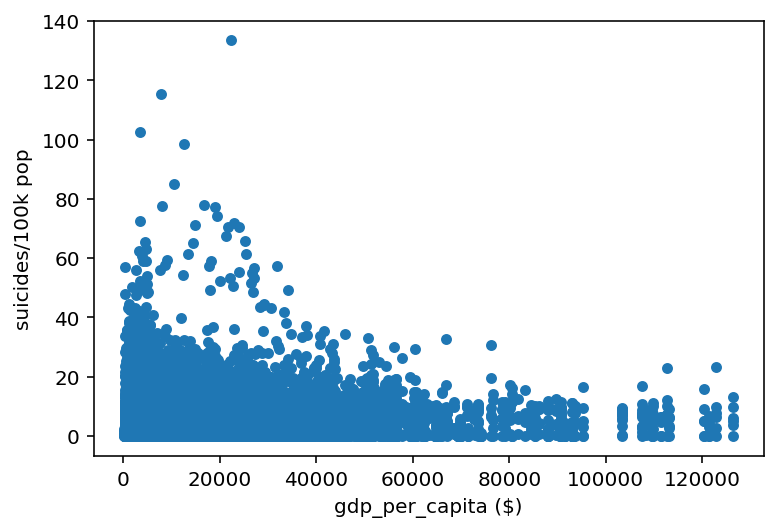

In [5]:
df.plot(kind='scatter',x='gdp_per_capita ($)',y='suicides/100k pop')

In [6]:
X = df.iloc[:, -1:].values
Y = df.iloc[:, 0].values

print(X)
print(Y)

[[ 796]
 [ 796]
 [ 796]
 ...
 [2309]
 [2309]
 [2309]]
[4.83 2.81 2.15 ... 2.58 1.67 1.46]


In [7]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model=regressor.fit(X_Train, y_Train) # FITTING MEANS TRAINING

# Predicting the Test set result ￼

Y_Pred = model.predict(X_Test)

In [8]:
print(model.coef_)
print(model.intercept_)

[1.61186653e-05]
5.146179891722458


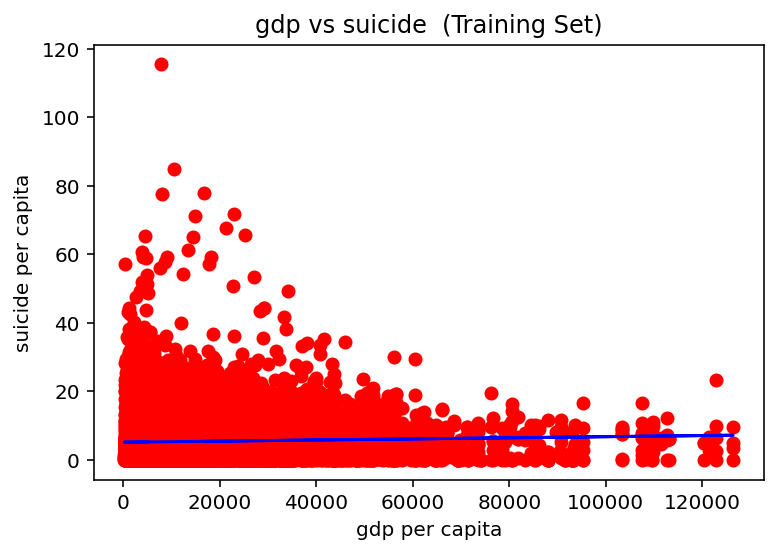

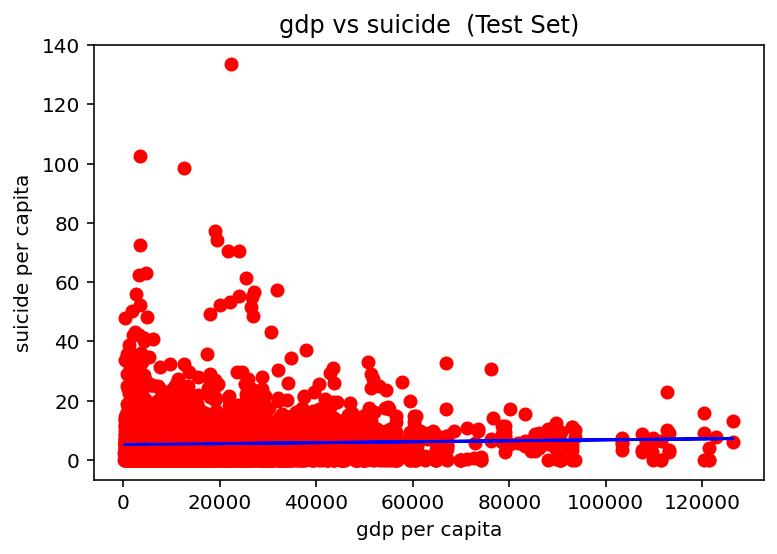

In [9]:
# Visualising the Training set results

plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('gdp vs suicide  (Training Set)')
plt.xlabel('gdp per capita')
plt.ylabel('suicide per capita')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('gdp vs suicide  (Test Set)')
plt.xlabel('gdp per capita')
plt.ylabel('suicide per capita')
plt.show()

In [10]:
model.score(X, Y)

0.002550151597456529

In [11]:
df.describe()

,suicides/100k pop,gdp_per_capita ($)
count,13910.000000,13910.000000
mean,5.392866,16866.464414
std,7.358993,18887.915954
min,0.000000,251.000000
25%,0.410000,3447.000000
50%,3.160000,9372.000000
75%,7.410000,24874.000000
max,133.420000,126352.000000
